# **Final Project: AI-Powered Image Wizard**

* Name: **Aktham Almomani**
* Date: **12/09/2024**

## **Stage 4: Inpainting Images**

## **Introduction**

The **inpainting stage** is a crucial part of the **AI-Powered Image Wizard pipeline**, where the goal is to intelligently reconstruct or fill in missing parts of an image. This stage is widely used in applications such as:

* Photo Restoration: Fixing damaged or missing regions in old photographs.
* Object Removal: Erasing unwanted objects from an image and seamlessly filling the background.
* Creative Editing: Generating novel content by altering specific regions of an image.

**How Inpainting Works:**
* Input: An image and a corresponding mask, where the mask specifies which parts of the image to fill in.
* Output: The model predicts and fills the masked area with realistic content based on the context of the surrounding pixels.
* AI-Powered Models: This process uses advanced deep learning models trained on massive image datasets to generate realistic and context-aware inpainting results.

## **Dataset**

For this stage, we are utilizing the **Flickr-Faces-HQ (FFHQ) dataset**, a high-quality image dataset specifically designed for face generation tasks. The FFHQ dataset provides:

* High Resolution: Images up to 1024x1024 resolution.
* Diversity: Images of faces with variations in age, ethnicity, accessories, and lighting conditions.
* Consistency: Clean and uniformly formatted data, making it ideal for training or testing AI models in image-based tasks like inpainting.

This dataset ensures a challenging yet realistic benchmark for evaluating the performance of our AI model during the inpainting stage.

## **Import Necessary Libraries:**

In [1]:
# Import required modules:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw
import numpy as np
import os
import kagglehub
from tqdm import tqdm
import time

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## **Dataset Download**

In [2]:
# let's first, Download the dataset:
path = kagglehub.dataset_download("arnaud58/flickrfaceshq-dataset-ffhq")
print("Path to dataset files:", path)

100%|██████████| 19.5G/19.5G [16:41<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arnaud58/flickrfaceshq-dataset-ffhq/versions/1


In [3]:
# let's set the image directory and output directory ... also let's check subdirectories contents:
image_dir = "/root/.cache/kagglehub/datasets/arnaud58/flickrfaceshq-dataset-ffhq/versions/1"

print("Contents of dataset directory:", os.listdir(image_dir))
output_dir = "./inpainting_results"
os.makedirs(output_dir, exist_ok=True)


for subdir in os.listdir(image_dir):
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        print(f"Contents of {subdir}:", os.listdir(subdir_path))

Contents of dataset directory: ['07337.png', '04444.png', '47928.png', '20022.png', '05771.png', '02823.png', '08582.png', '19022.png', '21839.png', '39019.png', '43936.png', '15449.png', '24213.png', '28745.png', '02196.png', '48406.png', '40192.png', '11315.png', '43545.png', '44272.png', '23384.png', '04931.png', '25215.png', '15301.png', '39843.png', '06462.png', '50986.png', '41234.png', '05736.png', '07968.png', '31253.png', '45838.png', '15022.png', '38588.png', '40113.png', '19194.png', '28063.png', '45015.png', '39489.png', '48161.png', '06438.png', '50593.png', '44310.png', '38413.png', '07091.png', '21309.png', '39020.png', '42334.png', '05329.png', '42994.png', '29085.png', '08343.png', '43125.png', '27138.png', '28891.png', '52120.png', '51493.png', '23143.png', '15180.png', '01316.png', '00314.png', '01700.png', '48794.png', '14091.png', '22360.png', '15847.png', '52563.png', '20107.png', '05888.png', '20982.png', '40242.png', '46652.png', '43769.png', '21182.png', '31800

## **Model Setup for Stable Diffusion Inpainting**

The **Stable Diffusion Inpainting** Pipeline is a cutting-edge pre-trained deep learning model designed specifically for inpainting tasks. Developed by StabilityAI, this model is a fine-tuned version of the popular Stable Diffusion model, with added capabilities for context-aware reconstruction of masked regions in images. It leverages latent diffusion, a powerful technique that combines efficiency and high-quality generation, making it a leading choice for inpainting tasks.

**Why Choose This Model?**
* Pre-Trained Power: The model is trained on large-scale datasets, allowing it to perform well out of the box without requiring additional training or fine-tuning.

* Context-Aware Reconstruction: It fills in the masked regions while maintaining consistency with the surrounding areas, ensuring natural and realistic outputs.

* Flexibility: Supports a wide range of use cases, including object removal, photo restoration, and creative edits and it Works with text prompts, enabling guided inpainting for specific scenarios.

* State-of-the-Art Performance: Combines speed and quality using latent diffusion techniques, making it efficient for real-time applications.


In [4]:
# Load the Stable Diffusion Inpainting Pipeline
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

## **Random Mask Generation for Inpainting**

In here, let's define create_random_mask function, is designed to generate random rectangular masks for inpainting tasks. The mask specifies the regions of the image to be filled or reconstructed by the inpainting model. The randomness in mask placement and size simulates diverse real-world scenarios, such as object removal, damage restoration, or editing.

By creating masks with a configurable mask_ratio, the function allows flexibility in defining how much of the image is occluded, ensuring the model is tested on a variety of inpainting challenges. This is a critical step in evaluating the robustness and adaptability of inpainting models like Stable Diffusion.

In [5]:
# Function to create a random mask
def create_random_mask(image, mask_ratio=0.3):
    """
    Create a random rectangular mask for inpainting.
    """
    width, height = image.size
    mask = Image.new("L", (width, height), 0)
    mask_draw = ImageDraw.Draw(mask)

    # Define random mask coordinates
    x = np.random.randint(0, width // 2)
    y = np.random.randint(0, height // 2)
    w = np.random.randint(width // 4, width // 2)
    h = np.random.randint(height // 4, height // 2)

    mask_draw.rectangle([x, y, x + w, y + h], fill=255)
    return mask

In [6]:
# Set a limit on the number of images to process:
MAX_IMAGES = 100

# Get the list of image files and limit the number of files processed:
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))][:MAX_IMAGES]
print(f"Processing {len(image_files)} images out of {len(os.listdir(image_dir))} available.")

Processing 100 images out of 52001 available.


## **Inpainting Execution with Progress Tracking**

This block of code executes the inpainting process by iterating through a set of input images, applying random masks, and using the Stable Diffusion Inpainting Pipeline to reconstruct the masked regions.

**Key features of this implementation include:**

* Progress Tracking: Utilizes the tqdm library to display a progress bar, showing the status of the inpainting process.
* Time Estimation: Calculates the average time per image and estimates the remaining time, ensuring better workflow management for larger datasets.
* Output Management: Saves the inpainted images with unique filenames, preserving results for further analysis.

This systematic approach ensures efficient processing and monitoring, making it ideal for handling large-scale datasets in inpainting tasks.

In [7]:
# Proceed with the inpainting code with progress tracking:
start_time = time.time()

for idx, image_file in enumerate(tqdm(image_files, desc="Inpainting Progress", unit="image")):
    # Load image:
    img_path = os.path.join(image_dir, image_file)
    image = Image.open(img_path).convert("RGB")

    # Create a mask:
    mask = create_random_mask(image)

    # Run inpainting:
    result = pipe(prompt="A realistic portrait", image=image, mask_image=mask).images[0]

    # Save output:
    result.save(os.path.join(output_dir, f"inpainted_{image_file}"))

    # Calculate elapsed and remaining time:
    elapsed_time = time.time() - start_time
    avg_time_per_image = elapsed_time / (idx + 1)
    remaining_time = avg_time_per_image * (len(image_files) - (idx + 1))
    tqdm.write(f"Processed {idx + 1}/{len(image_files)} images. Estimated time left: {remaining_time:.2f} seconds")

print("Inpainting complete!")


Inpainting Progress:   0%|          | 0/100 [00:00<?, ?image/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   1%|          | 1/100 [00:24<39:57, 24.21s/image]

Processed 1/100 images. Estimated time left: 2396.67 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   2%|▏         | 2/100 [00:46<38:03, 23.30s/image]

Processed 2/100 images. Estimated time left: 2296.70 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   3%|▎         | 3/100 [01:10<37:44, 23.34s/image]

Processed 3/100 images. Estimated time left: 2271.69 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   4%|▍         | 4/100 [01:34<37:57, 23.72s/image]

Processed 4/100 images. Estimated time left: 2269.43 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   5%|▌         | 5/100 [01:58<37:48, 23.88s/image]

Processed 5/100 images. Estimated time left: 2255.75 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   6%|▌         | 6/100 [02:22<37:19, 23.83s/image]

Processed 6/100 images. Estimated time left: 2231.64 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   7%|▋         | 7/100 [02:46<36:54, 23.81s/image]

Processed 7/100 images. Estimated time left: 2208.24 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   8%|▊         | 8/100 [03:10<36:35, 23.87s/image]

Processed 8/100 images. Estimated time left: 2187.45 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:   9%|▉         | 9/100 [03:34<36:14, 23.90s/image]

Processed 9/100 images. Estimated time left: 2165.48 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  10%|█         | 10/100 [03:58<35:50, 23.89s/image]

Processed 10/100 images. Estimated time left: 2142.44 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  11%|█         | 11/100 [04:21<35:25, 23.88s/image]

Processed 11/100 images. Estimated time left: 2119.08 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  12%|█▏        | 12/100 [04:45<35:04, 23.91s/image]

Processed 12/100 images. Estimated time left: 2096.55 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  13%|█▎        | 13/100 [05:09<34:39, 23.90s/image]

Processed 13/100 images. Estimated time left: 2073.01 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  14%|█▍        | 14/100 [05:33<34:14, 23.90s/image]

Processed 14/100 images. Estimated time left: 2049.55 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  15%|█▌        | 15/100 [05:57<33:52, 23.91s/image]

Processed 15/100 images. Estimated time left: 2026.35 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  16%|█▌        | 16/100 [06:21<33:30, 23.94s/image]

Processed 16/100 images. Estimated time left: 2003.39 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  17%|█▋        | 17/100 [06:45<33:04, 23.91s/image]

Processed 17/100 images. Estimated time left: 1979.51 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  18%|█▊        | 18/100 [07:09<32:40, 23.91s/image]

Processed 18/100 images. Estimated time left: 1955.89 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  19%|█▉        | 19/100 [07:33<32:18, 23.93s/image]

Processed 19/100 images. Estimated time left: 1932.60 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  20%|██        | 20/100 [07:57<31:51, 23.90s/image]

Processed 20/100 images. Estimated time left: 1908.59 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  21%|██        | 21/100 [08:21<31:28, 23.90s/image]

Processed 21/100 images. Estimated time left: 1884.91 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  22%|██▏       | 22/100 [08:45<31:05, 23.92s/image]

Processed 22/100 images. Estimated time left: 1861.46 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  23%|██▎       | 23/100 [09:08<30:42, 23.93s/image]

Processed 23/100 images. Estimated time left: 1837.90 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  24%|██▍       | 24/100 [09:32<30:17, 23.92s/image]

Processed 24/100 images. Estimated time left: 1814.05 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  25%|██▌       | 25/100 [09:56<29:52, 23.90s/image]

Processed 25/100 images. Estimated time left: 1790.17 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  26%|██▌       | 26/100 [10:20<29:30, 23.92s/image]

Processed 26/100 images. Estimated time left: 1766.59 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  27%|██▋       | 27/100 [10:44<29:08, 23.96s/image]

Processed 27/100 images. Estimated time left: 1743.15 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  28%|██▊       | 28/100 [11:08<28:42, 23.92s/image]

Processed 28/100 images. Estimated time left: 1719.17 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  29%|██▉       | 29/100 [11:32<28:15, 23.88s/image]

Processed 29/100 images. Estimated time left: 1695.10 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  30%|███       | 30/100 [11:56<27:52, 23.89s/image]

Processed 30/100 images. Estimated time left: 1671.34 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  31%|███       | 31/100 [12:20<27:31, 23.94s/image]

Processed 31/100 images. Estimated time left: 1647.83 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  32%|███▏      | 32/100 [12:44<27:06, 23.92s/image]

Processed 32/100 images. Estimated time left: 1623.92 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  33%|███▎      | 33/100 [13:08<26:41, 23.90s/image]

Processed 33/100 images. Estimated time left: 1599.97 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  34%|███▍      | 34/100 [13:32<26:19, 23.92s/image]

Processed 34/100 images. Estimated time left: 1576.30 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  35%|███▌      | 35/100 [13:56<25:59, 24.00s/image]

Processed 35/100 images. Estimated time left: 1552.92 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  36%|███▌      | 36/100 [14:20<25:37, 24.03s/image]

Processed 36/100 images. Estimated time left: 1529.42 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  37%|███▋      | 37/100 [14:44<25:16, 24.06s/image]

Processed 37/100 images. Estimated time left: 1505.96 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  38%|███▊      | 38/100 [15:08<24:47, 24.00s/image]

Processed 38/100 images. Estimated time left: 1481.96 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  39%|███▉      | 39/100 [15:32<24:22, 23.98s/image]

Processed 39/100 images. Estimated time left: 1458.10 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  40%|████      | 40/100 [15:56<24:01, 24.02s/image]

Processed 40/100 images. Estimated time left: 1434.49 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  41%|████      | 41/100 [16:20<23:37, 24.02s/image]

Processed 41/100 images. Estimated time left: 1410.77 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  42%|████▏     | 42/100 [16:44<23:10, 23.97s/image]

Processed 42/100 images. Estimated time left: 1386.79 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  43%|████▎     | 43/100 [17:08<22:44, 23.95s/image]

Processed 43/100 images. Estimated time left: 1362.84 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  44%|████▍     | 44/100 [17:32<22:20, 23.94s/image]

Processed 44/100 images. Estimated time left: 1338.95 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  45%|████▌     | 45/100 [17:56<21:57, 23.96s/image]

Processed 45/100 images. Estimated time left: 1315.15 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  46%|████▌     | 46/100 [18:19<21:33, 23.96s/image]

Processed 46/100 images. Estimated time left: 1291.30 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  47%|████▋     | 47/100 [18:43<21:09, 23.95s/image]

Processed 47/100 images. Estimated time left: 1267.41 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  48%|████▊     | 48/100 [19:07<20:46, 23.96s/image]

Processed 48/100 images. Estimated time left: 1243.58 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  49%|████▉     | 49/100 [19:31<20:20, 23.94s/image]

Processed 49/100 images. Estimated time left: 1219.62 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  50%|█████     | 50/100 [19:55<19:55, 23.90s/image]

Processed 50/100 images. Estimated time left: 1195.62 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  51%|█████     | 51/100 [20:19<19:31, 23.91s/image]

Processed 51/100 images. Estimated time left: 1171.74 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  52%|█████▏    | 52/100 [20:43<19:07, 23.91s/image]

Processed 52/100 images. Estimated time left: 1147.80 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  53%|█████▎    | 53/100 [21:07<18:44, 23.92s/image]

Processed 53/100 images. Estimated time left: 1123.91 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  54%|█████▍    | 54/100 [21:31<18:20, 23.91s/image]

Processed 54/100 images. Estimated time left: 1100.00 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  55%|█████▌    | 55/100 [21:55<17:56, 23.92s/image]

Processed 55/100 images. Estimated time left: 1076.10 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  56%|█████▌    | 56/100 [22:19<17:32, 23.92s/image]

Processed 56/100 images. Estimated time left: 1052.20 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  57%|█████▋    | 57/100 [22:43<17:08, 23.91s/image]

Processed 57/100 images. Estimated time left: 1028.26 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  58%|█████▊    | 58/100 [23:07<16:45, 23.94s/image]

Processed 58/100 images. Estimated time left: 1004.41 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  59%|█████▉    | 59/100 [23:30<16:21, 23.93s/image]

Processed 59/100 images. Estimated time left: 980.49 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  60%|██████    | 60/100 [23:55<16:01, 24.05s/image]

Processed 60/100 images. Estimated time left: 956.85 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  61%|██████    | 61/100 [24:19<15:36, 24.02s/image]

Processed 61/100 images. Estimated time left: 932.95 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  62%|██████▏   | 62/100 [24:43<15:10, 23.97s/image]

Processed 62/100 images. Estimated time left: 908.98 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  63%|██████▎   | 63/100 [25:06<14:45, 23.93s/image]

Processed 63/100 images. Estimated time left: 885.02 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  64%|██████▍   | 64/100 [25:30<14:20, 23.90s/image]

Processed 64/100 images. Estimated time left: 861.05 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  65%|██████▌   | 65/100 [25:54<13:56, 23.91s/image]

Processed 65/100 images. Estimated time left: 837.14 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  66%|██████▌   | 66/100 [26:18<13:33, 23.92s/image]

Processed 66/100 images. Estimated time left: 813.23 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  67%|██████▋   | 67/100 [26:42<13:09, 23.92s/image]

Processed 67/100 images. Estimated time left: 789.31 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  68%|██████▊   | 68/100 [27:06<12:44, 23.89s/image]

Processed 68/100 images. Estimated time left: 765.35 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  69%|██████▉   | 69/100 [27:30<12:21, 23.92s/image]

Processed 69/100 images. Estimated time left: 741.46 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  70%|███████   | 70/100 [27:54<11:57, 23.91s/image]

Processed 70/100 images. Estimated time left: 717.53 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  71%|███████   | 71/100 [28:18<11:32, 23.90s/image]

Processed 71/100 images. Estimated time left: 693.59 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  72%|███████▏  | 72/100 [28:42<11:09, 23.91s/image]

Processed 72/100 images. Estimated time left: 669.68 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  73%|███████▎  | 73/100 [29:05<10:45, 23.92s/image]

Processed 73/100 images. Estimated time left: 645.77 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  74%|███████▍  | 74/100 [29:29<10:21, 23.90s/image]

Processed 74/100 images. Estimated time left: 621.83 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  75%|███████▌  | 75/100 [29:53<09:57, 23.90s/image]

Processed 75/100 images. Estimated time left: 597.90 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  76%|███████▌  | 76/100 [30:17<09:32, 23.87s/image]

Processed 76/100 images. Estimated time left: 573.96 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  77%|███████▋  | 77/100 [30:41<09:09, 23.87s/image]

Processed 77/100 images. Estimated time left: 550.03 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  78%|███████▊  | 78/100 [31:05<08:45, 23.88s/image]

Processed 78/100 images. Estimated time left: 526.11 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  79%|███████▉  | 79/100 [31:29<08:21, 23.89s/image]

Processed 79/100 images. Estimated time left: 502.20 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  80%|████████  | 80/100 [31:53<07:58, 23.92s/image]

Processed 80/100 images. Estimated time left: 478.30 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  81%|████████  | 81/100 [32:17<07:34, 23.94s/image]

Processed 81/100 images. Estimated time left: 454.40 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  82%|████████▏ | 82/100 [32:41<07:10, 23.93s/image]

Processed 82/100 images. Estimated time left: 430.48 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  83%|████████▎ | 83/100 [33:05<06:46, 23.92s/image]

Processed 83/100 images. Estimated time left: 406.57 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  84%|████████▍ | 84/100 [33:29<06:23, 23.95s/image]

Processed 84/100 images. Estimated time left: 382.67 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  85%|████████▌ | 85/100 [33:52<05:58, 23.93s/image]

Processed 85/100 images. Estimated time left: 358.75 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  86%|████████▌ | 86/100 [34:16<05:34, 23.92s/image]

Processed 86/100 images. Estimated time left: 334.83 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  87%|████████▋ | 87/100 [34:40<05:10, 23.90s/image]

Processed 87/100 images. Estimated time left: 310.90 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  88%|████████▊ | 88/100 [35:04<04:46, 23.89s/image]

Processed 88/100 images. Estimated time left: 286.98 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  89%|████████▉ | 89/100 [35:28<04:22, 23.87s/image]

Processed 89/100 images. Estimated time left: 263.05 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  90%|█████████ | 90/100 [35:52<03:58, 23.88s/image]

Processed 90/100 images. Estimated time left: 239.14 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  91%|█████████ | 91/100 [36:16<03:34, 23.88s/image]

Processed 91/100 images. Estimated time left: 215.22 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  92%|█████████▏| 92/100 [36:40<03:11, 23.88s/image]

Processed 92/100 images. Estimated time left: 191.30 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  93%|█████████▎| 93/100 [37:03<02:47, 23.90s/image]

Processed 93/100 images. Estimated time left: 167.39 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  94%|█████████▍| 94/100 [37:27<02:23, 23.93s/image]

Processed 94/100 images. Estimated time left: 143.48 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  95%|█████████▌| 95/100 [37:51<01:59, 23.93s/image]

Processed 95/100 images. Estimated time left: 119.57 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  96%|█████████▌| 96/100 [38:15<01:35, 23.90s/image]

Processed 96/100 images. Estimated time left: 95.65 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  97%|█████████▋| 97/100 [38:39<01:11, 23.87s/image]

Processed 97/100 images. Estimated time left: 71.74 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  98%|█████████▊| 98/100 [39:03<00:47, 23.86s/image]

Processed 98/100 images. Estimated time left: 47.82 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress:  99%|█████████▉| 99/100 [39:27<00:23, 23.92s/image]

Processed 99/100 images. Estimated time left: 23.91 seconds


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting Progress: 100%|██████████| 100/100 [39:51<00:00, 23.91s/image]

Processed 100/100 images. Estimated time left: 0.00 seconds
Inpainting complete!


## **Inpainting Evaluation**

In this stage, we aim to assess the performance of the inpainting model by combining visual evaluation and metrics-based evaluation. This dual approach provides a comprehensive understanding of how well the model performs in reconstructing masked regions in the images.

### **Visual Evaluation**

Visual evaluation involves manually inspecting the inpainted images to:

* Check Seamlessness: Assess whether the inpainted regions blend naturally with the surrounding areas.
* Identify Artifacts: Spot any inconsistencies, blurry patches, or unnatural textures in the output.
* Gauge Contextual Accuracy: Ensure the inpainted content aligns well with the context of the unmasked regions.

This method is particularly useful for identifying subjective qualities of the outputs, which might not be captured by numerical metrics.

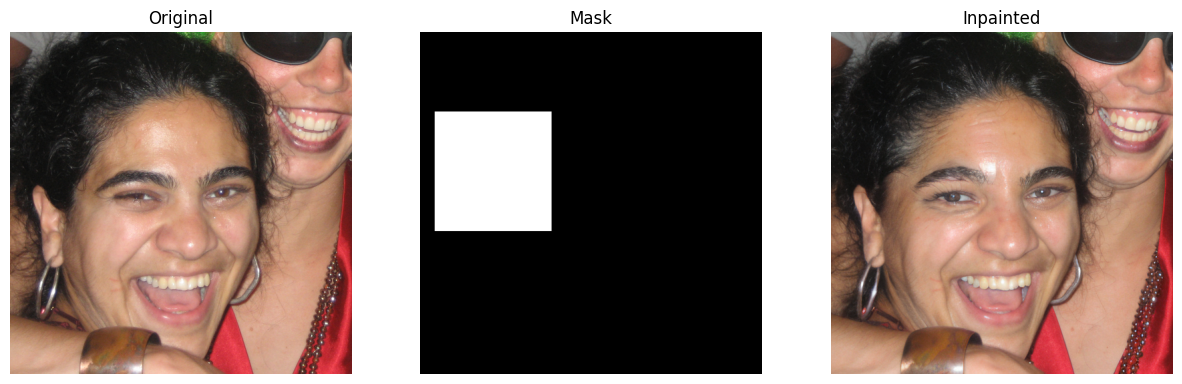

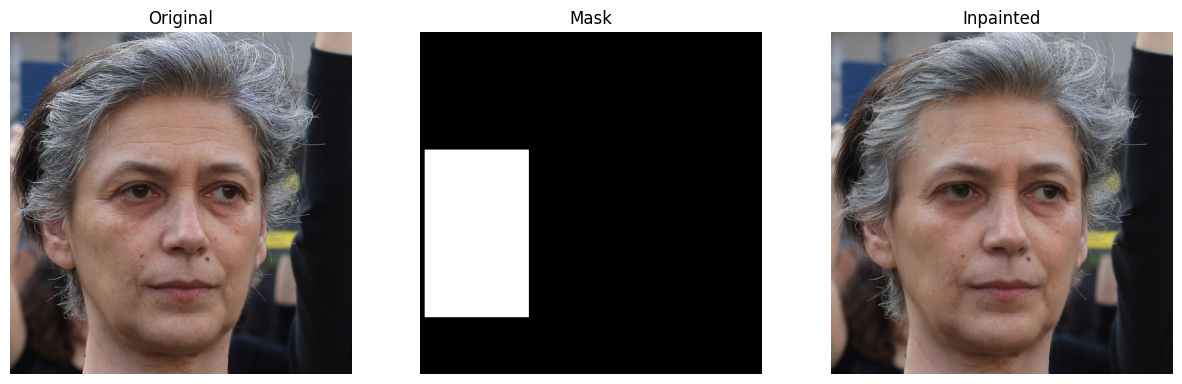

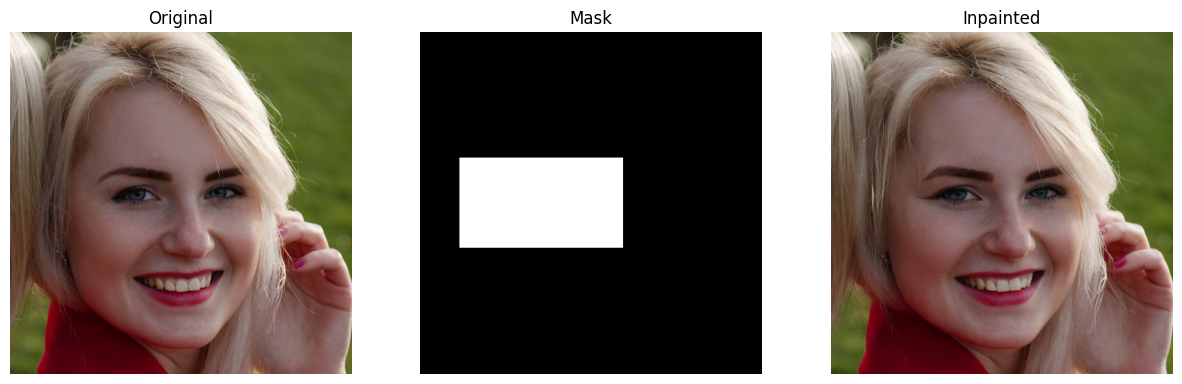

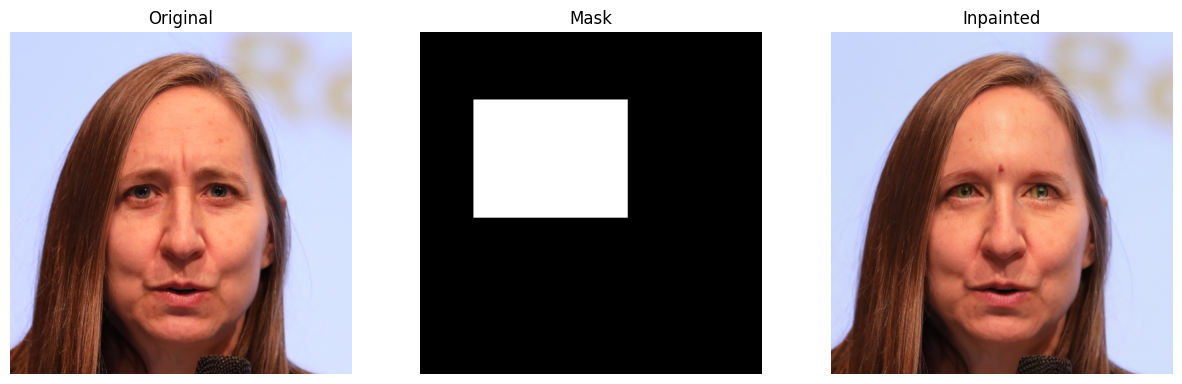

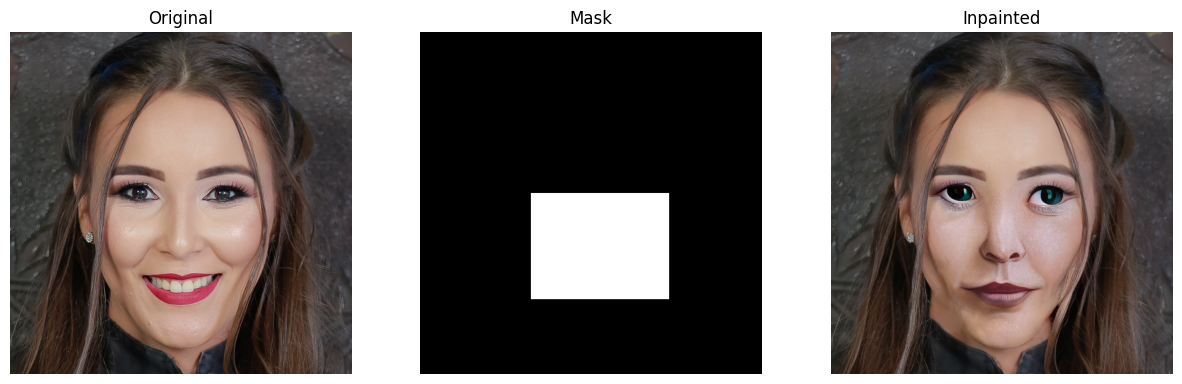

In [8]:
import matplotlib.pyplot as plt

def display_results(original, mask, inpainted):
    """
    Display the original image, mask, and inpainted result side-by-side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    axes[0].imshow(original)
    axes[0].set_title("Original")
    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask")
    axes[2].imshow(inpainted)
    axes[2].set_title("Inpainted")
    for ax in axes:
        ax.axis("off")
    plt.show()

# Example usage
for image_file in os.listdir(output_dir)[:5]:  # Show first 5 results
    inpainted = Image.open(os.path.join(output_dir, image_file))
    original = Image.open(os.path.join(image_dir, image_file.replace("inpainted_", "")))
    mask = create_random_mask(original)  # Generate the mask used
    display_results(original, mask, inpainted)


**Summary Highlights:**

* Visual Quality: Inpainted images closely resemble the originals with smooth blending and preserved textures.
* Mask Handling: Missing regions are effectively reconstructed, maintaining visual consistency.
* Challenges: Minor variations in color tone and subtle texture mismatches in complex areas.
* Overall: The model performs well, producing realistic and convincing inpainting results.

**Future Considerations:**
* Use perceptual loss for improved texture and color consistency.
* Add a GAN-based discriminator for sharper inpainting refinement.

### **Metric-based Evaluation**

Metrics-based evaluation involves the use of quantitative metrics to measure the similarity and quality of the inpainted images compared to the original images. The following metrics are used:

* **Structural Similarity Index (SSIM):**
   * Measures perceptual similarity between the original and inpainted images.
   * Focuses on structural information (e.g., shapes, textures).
   * Values range from 0 (no similarity) to 1 (perfect similarity).
   * Why SSIM? It emphasizes human perception of image quality, making it well-suited for inpainting tasks.

* **Peak Signal-to-Noise Ratio (PSNR):**
   * Measures pixel-level fidelity between the original and inpainted images.
   * Higher PSNR values indicate better image quality (less noise or distortion).


In [23]:
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr
import pandas as pd  # To compute and display statistics:

# SSIM Calculation:
def calculate_ssim(original, inpainted):
    original_np = np.array(original)
    inpainted_np = np.array(inpainted)

    # Normalize to [0, 1] if necessary:
    if original_np.max() > 1 or inpainted_np.max() > 1:
        original_np = original_np / 255.0
        inpainted_np = inpainted_np / 255.0

    # Dynamically calculate win_size:
    min_dim = min(original_np.shape[0], original_np.shape[1])  # Height and Width
    win_size = min(7, min_dim)

    # Calculate SSIM:
    return ssim(original_np, inpainted_np, win_size=win_size, channel_axis=-1, data_range=1.0)

# PSNR Calculation:
def calculate_psnr(original, inpainted):
    original_np = np.array(original)
    inpainted_np = np.array(inpainted)

    # Normalize to [0, 1] if necessary:
    if original_np.max() > 1 or inpainted_np.max() > 1:
        original_np = original_np / 255.0
        inpainted_np = inpainted_np / 255.0

    # Calculate PSNR
    return psnr(original_np, inpainted_np, data_range=1.0)

# Directories:
image_dir = "/root/.cache/kagglehub/datasets/arnaud58/flickrfaceshq-dataset-ffhq/versions/1"
output_dir = "/content/inpainting_results"

# Initialize lists to store metrics:
ssim_scores = []
psnr_scores = []

# Process the first 100 images:
image_files = os.listdir(output_dir)[:100]
for image_file in image_files:
    inpainted = Image.open(os.path.join(output_dir, image_file)).convert("RGB")
    original = Image.open(os.path.join(image_dir, image_file.replace("inpainted_", ""))).convert("RGB")

    # Calculate SSIM and PSNR:
    try:
        ssim_score = calculate_ssim(original, inpainted)
        psnr_score = calculate_psnr(original, inpainted)
        ssim_scores.append(ssim_score)
        psnr_scores.append(psnr_score)
    except ValueError as e:
        print(f"Error calculating metrics for {image_file}: {e}")

# Convert results to a DataFrame for easier analysis:
metrics_df = pd.DataFrame({
        "PSNR": psnr_scores,
        "SSIM": ssim_scores
})

# Calculate statistics:
statistics = {
    "Metric": ["SSIM", "PSNR"],
    "Mean": [metrics_df["SSIM"].mean(), metrics_df["PSNR"].mean()],
    "Median": [metrics_df["SSIM"].median(), metrics_df["PSNR"].median()],
    "Min": [metrics_df["SSIM"].min(), metrics_df["PSNR"].min()],
    "Max": [metrics_df["SSIM"].max(), metrics_df["PSNR"].max()],
    "90th Percentile": [metrics_df["SSIM"].quantile(0.9), metrics_df["PSNR"].quantile(0.9)],
    "95th Percentile": [metrics_df["SSIM"].quantile(0.95), metrics_df["PSNR"].quantile(0.95)],
}

# Convert statistics to a DataFrame for display:
statistics_df = pd.DataFrame(statistics)

# Display statistics:
statistics_df


Metric       Mean     Median        Min        Max  90th Percentile  \
0   SSIM   0.780863   0.783352   0.652354   0.870457         0.841055   
1   PSNR  25.534584  25.830718  18.467635  32.112989        28.842205   

   95th Percentile  
0         0.850937  
1        29.516826

**Summary Highlights:**

* **SSIM Performance:**

   * The inpainting model performs consistently well, with most images achieving SSIM values above `0.78`.
   * The 90th and 95th percentiles reflect strong performance, indicating the model is reliable in most cases.

* **PSNR Performance:**

   * A mean PSNR of `25.53` dB suggests reasonably good fidelity.
   * The 90th percentile PSNR of `28.84 dB` demonstrates that the model performs particularly well on the top `10%` of images.